In [2]:
#install the relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import os
import glob
from matplotlib import _cm
from matplotlib.colors import Normalize

1. Find Sales trends months wise
2. What is preferred Day most people placed orders
3. What time most people place the order
4. Find max, average , and min price on ordered product 
5. find top 5 most selling products
6. find top 5 customer who order most product 
7. Find which state ordering most of product 
8. Find most ordering product by most ordering state  
9. Find which product gives maximum sales

In [3]:
path = r'/Users/tosin/Desktop/Python_project/Sales_data'
csv_files =glob.glob(path + "/*.csv")

dfs = []

for csv_file in csv_files:
    dfs.append(pd.read_csv(csv_file))

    
data = pd.concat(dfs, ignore_index=True)

data


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"
...,...,...,...,...,...,...
186845,222905,AAA Batteries (4-pack),1,2.99,06/07/19 19:02,"795 Pine St, Boston, MA 02215"
186846,222906,27in FHD Monitor,1,149.99,06/01/19 19:29,"495 North St, New York City, NY 10001"
186847,222907,USB-C Charging Cable,1,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016"
186848,222908,USB-C Charging Cable,1,11.95,06/26/19 18:35,"916 Main St, San Francisco, CA 94016"


In [4]:
data.shape

(186850, 6)

In [5]:
# Checking for null values 
data.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [6]:
data.isnull().all(axis=1).sum() #Checking if the row is complete null or not 

545

In [7]:
#Removing the null values from the data 
data.dropna(how='all', inplace=True) #Removing null from complete rows 
data.shape

(186305, 6)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 186305 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 9.9+ MB


In [9]:
#Checking duplicated rows in dataset 
data.duplicated().sum() 


618

In [12]:
# Remove duplicates from dataframe 
data.drop_duplicates(keep= 'first', inplace= True)
data.duplicated().sum()

0

In [13]:
data.shape

(185687, 6)

In [14]:
# Checking Unique Values in each columns 
unique = {}
for i in data.columns: 
    unique[i] = data[i].unique() 
unique

{'Order ID': array(['295665', '295666', '295667', ..., '222907', '222908', '222909'],
       dtype=object),
 'Product': array(['Macbook Pro Laptop', 'LG Washing Machine', 'USB-C Charging Cable',
        '27in FHD Monitor', 'AA Batteries (4-pack)',
        'Bose SoundSport Headphones', 'AAA Batteries (4-pack)',
        'ThinkPad Laptop', 'Lightning Charging Cable', 'Google Phone',
        'Wired Headphones', 'Apple Airpods Headphones', 'Vareebadd Phone',
        'iPhone', '20in Monitor', '34in Ultrawide Monitor',
        'Flatscreen TV', '27in 4K Gaming Monitor', 'Product', 'LG Dryer'],
       dtype=object),
 'Quantity Ordered': array(['1', '2', '4', '3', 'Quantity Ordered', '7', '5', '6', '8', '9'],
       dtype=object),
 'Price Each': array(['1700', '600.0', '11.95', '149.99', '3.84', '99.99', '2.99',
        '999.99', '14.95', '600', '11.99', '150', '400', '700', '109.99',
        '379.99', '300', '389.99', 'Price Each', '700.0', '1700.0',
        '150.0', '300.0', '400.0'], dtype=ob

In [15]:
# Removing inconsistent data from columns
unique = {}
for i in data.columns:
    data = data.drop(data[data[i]== i].index) #removing rows which are present in colimns name data
    unique[i] = data[i].unique()

unique # checking unique values after removing the inconsistency in data  

{'Order ID': array(['295665', '295666', '295667', ..., '222907', '222908', '222909'],
       dtype=object),
 'Product': array(['Macbook Pro Laptop', 'LG Washing Machine', 'USB-C Charging Cable',
        '27in FHD Monitor', 'AA Batteries (4-pack)',
        'Bose SoundSport Headphones', 'AAA Batteries (4-pack)',
        'ThinkPad Laptop', 'Lightning Charging Cable', 'Google Phone',
        'Wired Headphones', 'Apple Airpods Headphones', 'Vareebadd Phone',
        'iPhone', '20in Monitor', '34in Ultrawide Monitor',
        'Flatscreen TV', '27in 4K Gaming Monitor', 'LG Dryer'],
       dtype=object),
 'Quantity Ordered': array(['1', '2', '4', '3', '7', '5', '6', '8', '9'], dtype=object),
 'Price Each': array(['1700', '600.0', '11.95', '149.99', '3.84', '99.99', '2.99',
        '999.99', '14.95', '600', '11.99', '150', '400', '700', '109.99',
        '379.99', '300', '389.99', '700.0', '1700.0', '150.0', '300.0',
        '400.0'], dtype=object),
 'Order Date': array(['12/30/19 00:01', '12/2

In [16]:
# checking inconsistent data types
data.dtypes # checking data types of all columns 

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [17]:
# Renaming columns name 
data.rename(columns= {'Order ID': 'Order_id',
    'Product': 'Product_name',
    'Quantity Ordered': 'Quantity_ordered',
    'Price Each': 'Product_price',
    'Order Date': 'Order_date',
    'Purchase Address': 'Purchase_address'},  inplace= True)

In [18]:
data.columns

Index(['Order_id', 'Product_name', 'Quantity_ordered', 'Product_price',
       'Order_date', 'Purchase_address'],
      dtype='object')

In [19]:
# Checking inconsistent values in dataframe
v_count = {}
for i in data.columns:
    v_count[i] = data[i].value_counts()

v_count

{'Order_id': Order_id
 160873    5
 304802    4
 312407    4
 165665    4
 277875    4
          ..
 169570    1
 169571    1
 169572    1
 169573    1
 222909    1
 Name: count, Length: 178437, dtype: int64,
 'Product_name': Product_name
 USB-C Charging Cable          21859
 Lightning Charging Cable      21610
 AAA Batteries (4-pack)        20612
 AA Batteries (4-pack)         20558
 Wired Headphones              18849
 Apple Airpods Headphones      15525
 Bose SoundSport Headphones    13298
 27in FHD Monitor               7498
 iPhone                         6840
 27in 4K Gaming Monitor         6225
 34in Ultrawide Monitor         6174
 Google Phone                   5522
 Flatscreen TV                  4794
 Macbook Pro Laptop             4721
 ThinkPad Laptop                4126
 20in Monitor                   4098
 Vareebadd Phone                2065
 LG Washing Machine              666
 LG Dryer                        646
 Name: count, dtype: int64,
 'Quantity_ordered': Quantity_

In [20]:
#Change data type of columns according to data 
data['Order_id' ]= data["Order_id"].astype(int)
data['Quantity_ordered'] = data['Quantity_ordered'].astype("int32")
data['Product_price'] = data['Product_price'].astype(float)
data['Order_date'] = pd.to_datetime(data['Order_date'], format= '%m/%d/%y %H:%M') 


data

,Order_id,Product_name,Quantity_ordered,Product_price,Order_date,Purchase_address
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301"
...,...,...,...,...,...,...
186845,222905,AAA Batteries (4-pack),1,2.99,2019-06-07 19:02:00,"795 Pine St, Boston, MA 02215"
186846,222906,27in FHD Monitor,1,149.99,2019-06-01 19:29:00,"495 North St, New York City, NY 10001"
186847,222907,USB-C Charging Cable,1,11.95,2019-06-22 18:57:00,"319 Ridge St, San Francisco, CA 94016"
186848,222908,USB-C Charging Cable,1,11.95,2019-06-26 18:35:00,"916 Main St, San Francisco, CA 94016"


In [21]:
# Seperating months name or date from Datetime column
data['Order_date'] = pd.to_datetime(data['Order_date'])
data['Month_name'] = data['Order_date'].dt.strftime('%B') # It will give complete months names

data['Dates'] = data['Order_date'].dt.date
data['Time'] = data['Order_date'].dt.time
data['Day'] = data['Order_date'].dt.day_name()
data['Hour'] = data['Order_date'].dt.hour
data


,Order_id,Product_name,Quantity_ordered,Product_price,Order_date,Purchase_address,Month_name,Dates,Time,Day,Hour
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",December,2019-12-30,00:01:00,Monday,0
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",December,2019-12-29,07:03:00,Sunday,7
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",December,2019-12-12,18:21:00,Thursday,18
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",December,2019-12-22,15:13:00,Sunday,15
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",December,2019-12-18,12:38:00,Wednesday,12
...,...,...,...,...,...,...,...,...,...,...,...
186845,222905,AAA Batteries (4-pack),1,2.99,2019-06-07 19:02:00,"795 Pine St, Boston, MA 02215",June,2019-06-07,19:02:00,Friday,19
186846,222906,27in FHD Monitor,1,149.99,2019-06-01 19:29:00,"495 North St, New York City, NY 10001",June,2019-06-01,19:29:00,Saturday,19
186847,222907,USB-C Charging Cable,1,11.95,2019-06-22 18:57:00,"319 Ridge St, San Francisco, CA 94016",June,2019-06-22,18:57:00,Saturday,18
186848,222908,USB-C Charging Cable,1,11.95,2019-06-26 18:35:00,"916 Main St, San Francisco, CA 94016",June,2019-06-26,18:35:00,Wednesday,18


In [22]:
# Seperate Numerical and Categorical Data 
cat = data[[i for i in data.columns if data[i].dtypes == 'object']]
num = data[[i for i in data.columns if data[i].dtypes in ['int32', 'float'] and i not in ['Order_id']]]
num


,Quantity_ordered,Product_price,Hour
0,1,1700.00,0
1,1,600.00,7
2,1,11.95,18
3,1,149.99,15
4,1,11.95,12
...,...,...,...
186845,1,2.99,19
186846,1,149.99,19
186847,1,11.95,18
186848,1,11.95,18


In [23]:
data['Hour'].dtype
#data['Quantity_ordered']== 3).sum()

dtype('int32')

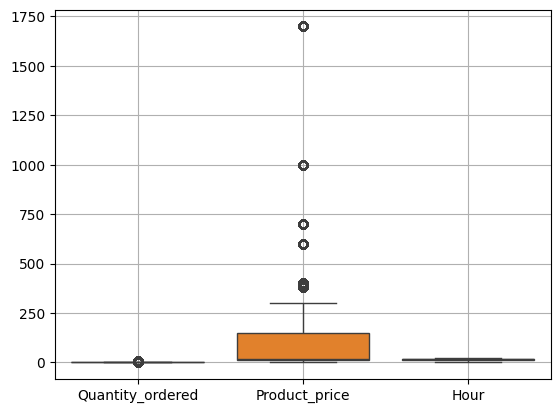

In [24]:
# Check outliers in data 
sns.boxplot(num)
plt.gca().grid(True)
plt.show()

In [25]:
# Finding q1, q3 and IQR to check outlier
q1 = num.quantile(.25)
q3 = num.quantile(.75)
IQR = q3-q1
IRQ_upper = (q3 + 1.5 * IQR)
IQR_lower = (q1 -1.5 * IQR)
IRQ_upper

Quantity_ordered      1.000
Product_price       357.075
Hour                 31.000
dtype: float64

In [26]:
# Removing outliers by replacing mean
data.head()

,Order_id,Product_name,Quantity_ordered,Product_price,Order_date,Purchase_address,Month_name,Dates,Time,Day,Hour
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",December,2019-12-30,00:01:00,Monday,0
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",December,2019-12-29,07:03:00,Sunday,7
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",December,2019-12-12,18:21:00,Thursday,18
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",December,2019-12-22,15:13:00,Sunday,15
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",December,2019-12-18,12:38:00,Wednesday,12


In [27]:
data.loc[(data['Product_price'] > 357.05) | (data['Product_price'] < -195.125), 'Product_price'] = data['Product_price'].mean()

<Axes: ylabel='Product_price'>

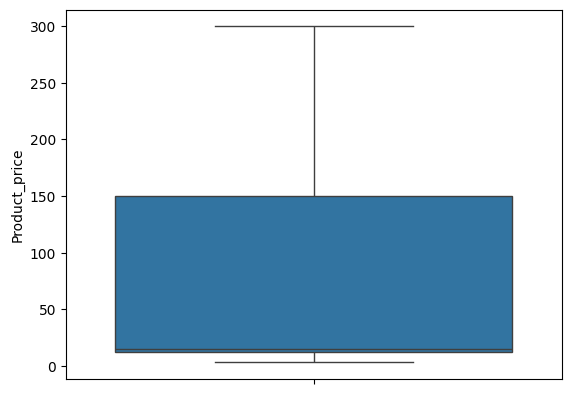

In [28]:
sns.boxplot(data['Product_price'])

In [29]:
num.describe()

,Quantity_ordered,Product_price,Hour
count,185686.000000,185686.000000,185686.000000
mean,1.124544,184.519255,14.412934
std,0.443069,332.843838,5.423329
min,1.000000,2.990000,0.000000
25%,1.000000,11.950000,11.000000
50%,1.000000,14.950000,15.000000
75%,1.000000,150.000000,19.000000
max,9.000000,1700.000000,23.000000


In [34]:
# Splitting the address by the last two components (state and ZIP)
#state_zip_split = data['Purchase_address'].str.rsplit(n=1, expand=True)

# Inserting a comma between the state and ZIP code
#state_zip_split[0] = state_zip_split[0] + ','
# data['Purchase_address'] = state_zip_split[0] + state_zip_split[1]
# data['Purchase_address'] = data['Purchase_address'].str.strip(',')
data

,Order_id,Product_name,Quantity_ordered,Product_price,Order_date,Purchase_address,Month_name,Dates,Time,Day,Hour
0,295665,Macbook Pro Laptop,1,184.519255,2019-12-30 00:01:00,"136 Church St, New York City, NY,10001",December,2019-12-30,00:01:00,Monday,0
1,295666,LG Washing Machine,1,184.519255,2019-12-29 07:03:00,"562 2nd St, New York City, NY,10001",December,2019-12-29,07:03:00,Sunday,7
2,295667,USB-C Charging Cable,1,11.950000,2019-12-12 18:21:00,"277 Main St, New York City, NY,10001",December,2019-12-12,18:21:00,Thursday,18
3,295668,27in FHD Monitor,1,149.990000,2019-12-22 15:13:00,"410 6th St, San Francisco, CA,94016",December,2019-12-22,15:13:00,Sunday,15
4,295669,USB-C Charging Cable,1,11.950000,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA,30301",December,2019-12-18,12:38:00,Wednesday,12
...,...,...,...,...,...,...,...,...,...,...,...
186845,222905,AAA Batteries (4-pack),1,2.990000,2019-06-07 19:02:00,"795 Pine St, Boston, MA,02215",June,2019-06-07,19:02:00,Friday,19
186846,222906,27in FHD Monitor,1,149.990000,2019-06-01 19:29:00,"495 North St, New York City, NY,10001",June,2019-06-01,19:29:00,Saturday,19
186847,222907,USB-C Charging Cable,1,11.950000,2019-06-22 18:57:00,"319 Ridge St, San Francisco, CA,94016",June,2019-06-22,18:57:00,Saturday,18
186848,222908,USB-C Charging Cable,1,11.950000,2019-06-26 18:35:00,"916 Main St, San Francisco, CA,94016",June,2019-06-26,18:35:00,Wednesday,18


In [36]:
# Seperatting Street, City, State, and Zip from Purchase_address column
data['Street'] = data['Purchase_address'].str.split(',').str[0]
data['City'] = data['Purchase_address'].str.split(',').str[1]
data['State'] = data['Purchase_address'].str.split(',').str[2]
data['Zip'] = data['Purchase_address'].str.split(',').str[3]
data

,Order_id,Product_name,Quantity_ordered,Product_price,Order_date,Purchase_address,Month_name,Dates,Time,Day,Hour,Street,Zip,City,State
0,295665,Macbook Pro Laptop,1,184.519255,2019-12-30 00:01:00,"136 Church St, New York City, NY,10001",December,2019-12-30,00:01:00,Monday,0,136 Church St,10001,New York City,NY
1,295666,LG Washing Machine,1,184.519255,2019-12-29 07:03:00,"562 2nd St, New York City, NY,10001",December,2019-12-29,07:03:00,Sunday,7,562 2nd St,10001,New York City,NY
2,295667,USB-C Charging Cable,1,11.950000,2019-12-12 18:21:00,"277 Main St, New York City, NY,10001",December,2019-12-12,18:21:00,Thursday,18,277 Main St,10001,New York City,NY
3,295668,27in FHD Monitor,1,149.990000,2019-12-22 15:13:00,"410 6th St, San Francisco, CA,94016",December,2019-12-22,15:13:00,Sunday,15,410 6th St,94016,San Francisco,CA
4,295669,USB-C Charging Cable,1,11.950000,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA,30301",December,2019-12-18,12:38:00,Wednesday,12,43 Hill St,30301,Atlanta,GA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186845,222905,AAA Batteries (4-pack),1,2.990000,2019-06-07 19:02:00,"795 Pine St, Boston, MA,02215",June,2019-06-07,19:02:00,Friday,19,795 Pine St,02215,Boston,MA
186846,222906,27in FHD Monitor,1,149.990000,2019-06-01 19:29:00,"495 North St, New York City, NY,10001",June,2019-06-01,19:29:00,Saturday,19,495 North St,10001,New York City,NY
186847,222907,USB-C Charging Cable,1,11.950000,2019-06-22 18:57:00,"319 Ridge St, San Francisco, CA,94016",June,2019-06-22,18:57:00,Saturday,18,319 Ridge St,94016,San Francisco,CA
186848,222908,USB-C Charging Cable,1,11.950000,2019-06-26 18:35:00,"916 Main St, San Francisco, CA,94016",June,2019-06-26,18:35:00,Wednesday,18,916 Main St,94016,San Francisco,CA


In [37]:
# Visualization
# Findind Sales Trends Months Wise
months_sale = data[['Product_price', 'Month_name']].groupby('Month_name').sum().sort_values('Product_price')
percent_sales = (months_sale/months_sale['Product_price'].sum()*100).round(2)
percent_sales.sort_values('Month_name', ascending = True)
percent_sales 

,Product_price
Month_name,
January,5.28
September,6.14
February,6.46
August,6.53
June,7.44
July,7.75
March,8.17
May,8.89
November,9.35


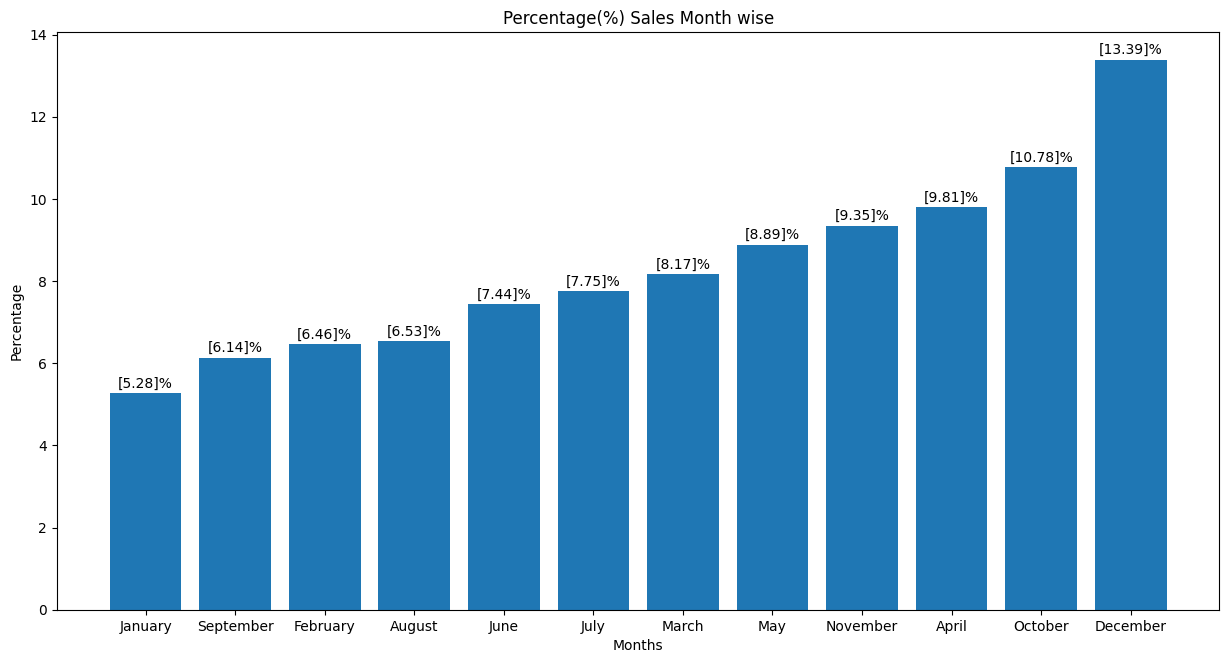

In [38]:
plt.figure(figsize= (15,7.5))
plt.bar(x=percent_sales.index, height=percent_sales['Product_price'])
offset = max(percent_sales['Product_price'])*0.01

for i,j in enumerate(percent_sales.values):
    plt.text(percent_sales.index[i], percent_sales.values[i]+ offset, str(f'{j}%'), ha='center')


plt.title("Percentage(%) Sales Month wise")
plt.xlabel("Months")
plt.ylabel("Percentage")
plt.show()


In [39]:
# What is the day preferred day most 
sale_day = data[['Day', 'Order_id']].groupby('Day').count().sort_values('Order_id', ascending = True)
#percentage_sale_day=sale_day/sale_day.sum()*100
#percentage_sale_day
#sale_day.sort_values('Order_id',ascending=False)
sale_day

,Order_id
Day,
Friday,26214
Thursday,26418
Wednesday,26438
Saturday,26453
Monday,26508
Sunday,26518
Tuesday,27137


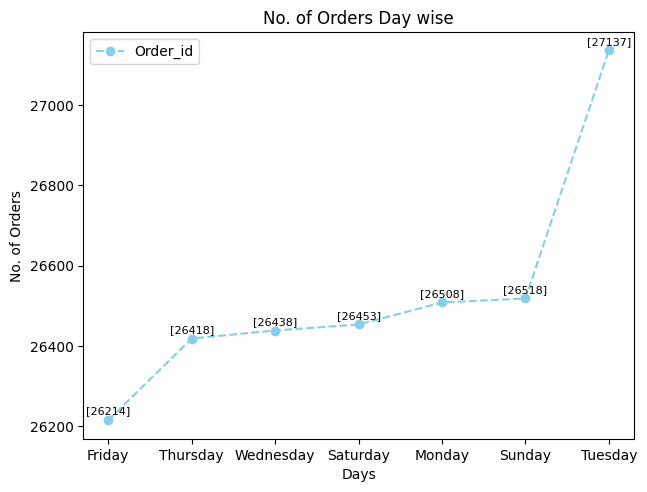

In [40]:
offset=10
sale_day.plot(color='skyblue', marker='o', linestyle='--')

for i,j in enumerate(sale_day.values):
    plt.text(i, j+offset, str(j), ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.title("No. of Orders Day wise")
plt.xlabel("Days")
plt.ylabel("No. of Orders")
plt.show()

In [41]:
#Find max, average , and min price on ordered product 
max_min_price=data[["Product_price"]].describe()
max_min_price

,Product_price
count,185686.000000
mean,77.804909
std,82.971502
min,2.990000
25%,11.950000
50%,14.950000
75%,150.000000
max,300.000000


In [51]:
# data.to_excel(r"/Users/tosin/Desktop/Python_project/project.xlsx",excel_writer= project.xlsx, index = False, header= True)
#writer = pd.ExcelWriter("project.xlsx",engine='xlsxwriter')
#data.to_excel(writer,sheet_name='sheetname')
#writer.save()
data.to_excel('project.xlsx', index = False, header= True)

In [52]:
data.shape

(185686, 15)

In [43]:
data.to_csv(r"/Users/tosin/Desktop/Python_project/project.csv", index = False)